In [207]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2


In [150]:
data = pd.read_csv('log.csv', sep=';')
values = np.array(data.values)
data.head()

,Generation,x,y,z
0,0,-1.23983,3.25678,14.2437
1,0,-1.23983,3.40469,14.8582
2,0,-1.23983,3.45619,15.0008
3,0,8.00981,-5.83543,19.3786
4,0,8.00981,-5.83543,19.3786


In [153]:
gen = 150
chromosize = 2
popsize = 10

In [154]:
grouped_data = {}

for array in values:
    key = array[0]
    if key not in grouped_data:
        grouped_data[key] = []
    grouped_data[key].append(array[1:])

grouped_by_generations = [grouped_data[key] for key in sorted(grouped_data.keys())]
grouped_by_generations = np.array(grouped_by_generations)

In [180]:
def select(gen, from_point, to_point):
    x = grouped_by_generations[gen][from_point:to_point, 0]
    y = grouped_by_generations[gen][from_point:to_point, 1]
    z = grouped_by_generations[gen][from_point:to_point, 2]

    print(f'Generation {gen}')
    print(f'Max x: {max(x)}')
    print(f'Min x: {min(x)}')

    print(f'Max y: {max(y)}')
    print(f'Min y: {min(y)}')

    print(f'Max z: {max(z)}')
    print(f'Min z: {min(z)}')

    return x, y, z


def fmt_sci(val):
    return "{:.2e}".format(val)


Generation 100
Max x: 1.73524
Min x: -2.08642
Max y: 1.54379
Min y: -0.844695
Max z: 9.10349
Min z: 0.0591566
Best element: 0.05915664839770374


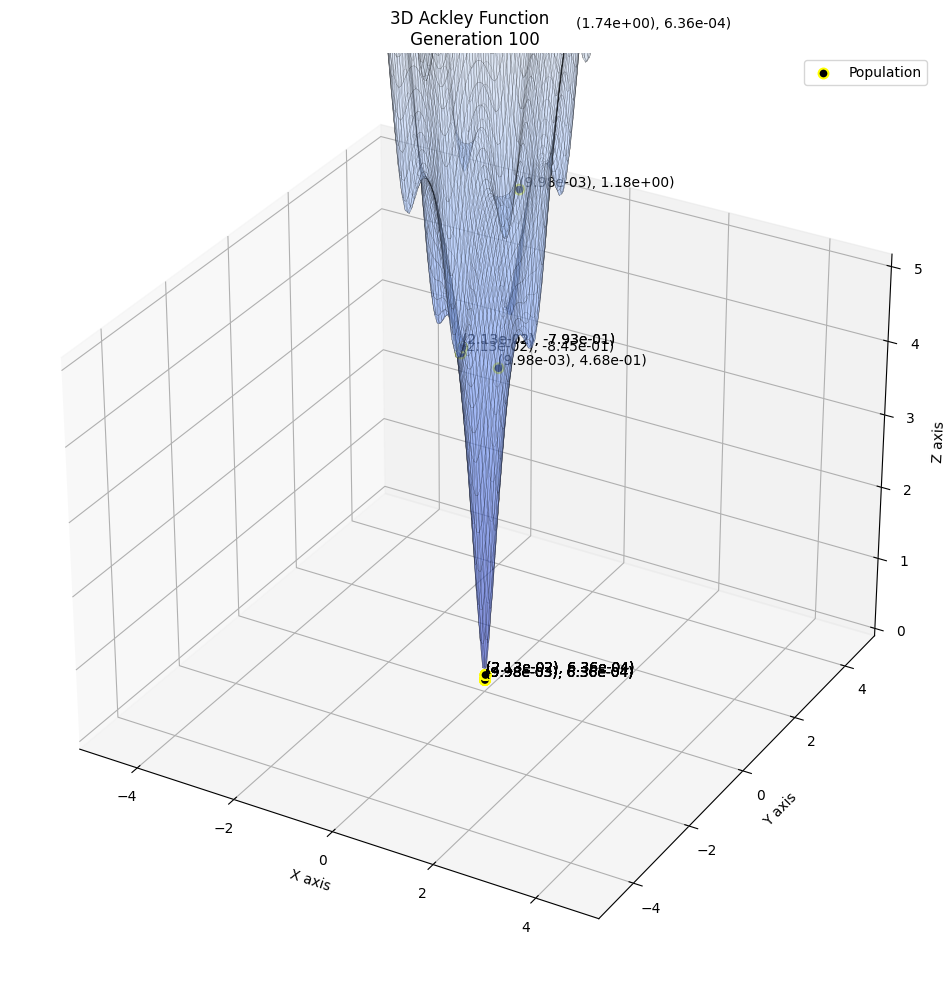

In [243]:
# def rastrigin(X, Y, A=10):
#     return A * 2 + (X**2 - A * np.cos(2 * np.pi * X)) + (Y**2 - A * np.cos(2 * np.pi * Y))

def ackley(X, Y, A=20, B=0.4, C=2 * np.pi):
    return -A * np.exp(-B * np.sqrt(0.5 * (X**2 + Y**2))) - np.exp(0.5 * (np.cos(C * X) + np.cos(C * Y))) + A + np.exp(1)

def plot_log(selected_gen, zoom_factor=1):
    fig = plt.figure(figsize=(18, 12))
    ax = fig.add_subplot(111, projection='3d')

    # Plot the points
    from_element = 0
    to_element = 20
    
    # max_elements = (to_element - from_element)

    points_x, points_y, points_z = select(selected_gen, from_element, to_element)
    best = ackley(points_x[0], points_y[0])
    print(f'Best element: {ackley(points_x[0], points_y[0])}')

    ax.scatter(points_x, points_y, points_z, color='black', label='Population', alpha=1, s=50, edgecolors='yellow', linewidth=1.5)

    for i in range(0, len(points_x)):
        ax.text(points_x[i], points_y[i], points_z[i], f'({fmt_sci(points_x[i])}), {fmt_sci(points_y[i])})', color='black', fontsize=10, ha='left', va='bottom')

    x_limit = 10 / zoom_factor
    y_limit = 10 / zoom_factor
    z_limit = 20 / zoom_factor

    X_MIN = -x_limit
    X_MAX = x_limit

    Y_MIN = -y_limit
    Y_MAX = y_limit

    Z_MIN = -z_limit
    Z_MAX = best + 10 / zoom_factor

    SAMPLES = 200

    # Create a meshgrid
    x = np.linspace(X_MIN, X_MAX, SAMPLES)  # Coarser grid for x and y
    y = np.linspace(X_MIN, Y_MAX, SAMPLES)
    X, Y = np.meshgrid(x, y)
    Z = ackley(X, Y)

    ax.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha=0.4, edgecolor='black', lw=0.2, cmap='coolwarm')


    ax.set_xlim(X_MIN, X_MAX)
    ax.set_ylim(Y_MIN, Y_MAX)
    ax.set_zlim(0, Z_MAX)


    # Labels and title
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')
    ax.set_title(f'3D Ackley Function \n Generation {selected_gen}', fontsize=20)
    ax.legend()


# plot_log(100, 2)


In [244]:
OUT_FOLDER = './img'

def make_images_from_plot():
    for i in range(100):
        plot_log(i, 1 + i/100)

        print(i)
        plt.savefig(f'{OUT_FOLDER}/img_{i}.png')
        plt.close()

In [245]:
make_images_from_plot()

Generation 0
Max x: 15.2011
Min x: -12.8726
Max y: 27.159
Min y: -20.8508
Max z: 22.0828
Min z: 14.2437
Best element: 14.243649994289145
0
Generation 1
Max x: 18.48
Min x: -4.75861
Max y: 16.7568
Min y: -20.8508
Max z: 22.2438
Min z: 14.2437
Best element: 14.243649994289145
1
Generation 2
Max x: 18.48
Min x: -4.75861
Max y: 4.84427
Min y: -15.0476
Max z: 22.2438
Min z: 14.2437
Best element: 14.243649994289145
2
Generation 3
Max x: 18.48
Min x: -4.75861
Max y: 6.45223
Min y: -15.0476
Max z: 22.2618
Min z: 14.2437
Best element: 14.243649994289145
3
Generation 4
Max x: 8.00981
Min x: -4.75861
Max y: 4.1904
Min y: -15.0476
Max z: 20.8312
Min z: 14.2437
Best element: 14.243649994289145
4
Generation 5
Max x: -0.77474
Min x: -4.75861
Max y: 5.53151
Min y: -15.0476
Max z: 20.8312
Min z: 12.7084
Best element: 12.708397188428023
5
Generation 6
Max x: 0.248726
Min x: -4.75861
Max y: 4.72036
Min y: 2.17273
Max z: 17.7978
Min z: 12.7084
Best element: 12.708397188428023
6
Generation 7
Max x: 2.38752

In [ ]:
def create_video_from_images(image_folder, output_video, fps):
    images = [img for img in os.listdir(image_folder) if img.endswith(".png")]
    images.sort(key=lambda x: int(x.split('_')[1].split('.')[0]))  # Sort images numerically

    frame = cv2.imread(os.path.join(image_folder, images[0]))
    height, width, layers = frame.shape

    video = cv2.VideoWriter(output_video, cv2.VideoWriter_fourcc(*"mp4v"), fps, (width, height))

    for image in images:
        video.write(cv2.imread(os.path.join(image_folder, image)))

    cv2.destroyAllWindows()
    video.release()

# Specify the folder containing the images, the output video path, and frames per second (fps)
image_folder = OUT_FOLDER
output_video = "ga_de_all_params_hist_video.mp4"
fps = 30  # Frames per second

create_video_from_images(image_folder, output_video, fps)